<a href="https://colab.research.google.com/github/rychard-coder/-Trabalho_SAD-/blob/main/Trabalho_SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install adjustText

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import datetime
import calendar
from matplotlib.ticker import PercentFormatter
import geopandas as gpd
import re
import adjustText as aT
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from catboost.utils import get_confusion_matrix
from catboost import cv
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caminho do arquivo
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

try:
    # Carregar CSV com delimitador correto, encoding e ignorando linhas problemáticas
    df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

    # Exibindo número de linhas e colunas para verificação
    num_rows, num_cols = df.shape
    print("Número de linhas:", num_rows)
    print("Número de colunas:", num_cols)

    # Exibindo as primeiras linhas do DataFrame
    print(df.head())

    # Prossiga com o restante das análises ou manipulações no DataFrame
    # Exemplo: verificando informações básicas
    print("Informações gerais sobre o DataFrame:")
    print(df.info())

except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")


Número de linhas: 9546
Número de colunas: 8
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
Informações gerais 

In [ ]:
import os

# Obtendo o tamanho do arquivo em KB
file_size_kb = os.path.getsize(file_path) / 1024
print("Tamanho do arquivo (KB):", file_size_kb)

Tamanho do arquivo (KB): 1032.6767578125


In [ ]:
df.info()  # Exibe informações sobre cada coluna e tipo de dado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [ ]:
df.head()


,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [ ]:
df.dtypes


,0
Student ID,int64
Student Country,object
Question ID,int64
Type of Answer,int64
Question Level,object
Topic,object
Subtopic,object
Keywords,object


In [ ]:
df.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [ ]:

file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

try:
    # Carregando os dados no DataFrame goldprice
    MathE= pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')  # Ajuste o delimitador e encoding

    # Verificando valores nulos
    print("Valores nulos por coluna:")
    print(MathE.isnull().sum())  # Retorna a soma de valores nulos por coluna

    # Exibindo as 5 primeiras linhas para verificar o carregamento
    print("\nPrimeiras linhas do DataFrame:")
    print(MathE.head())
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")



Valores nulos por coluna:
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64

Primeiras linhas do DataFrame:
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative fre

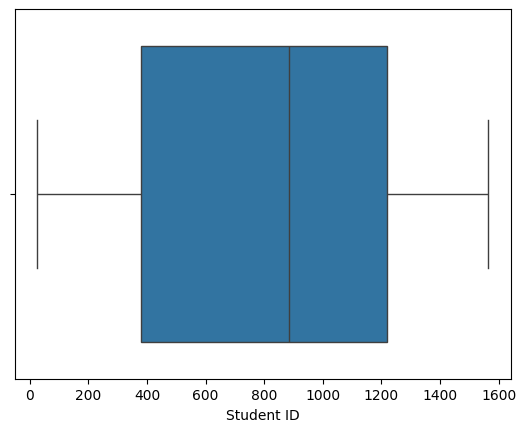

In [ ]:

sbn.boxplot(x=MathE['Student ID'])

# Exibir o gráfico
plt.show()


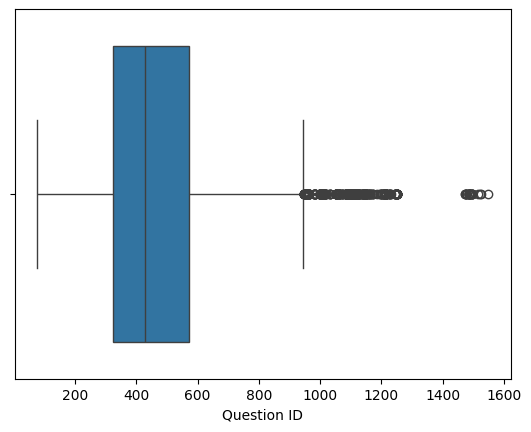

In [ ]:
sbn.boxplot(x=MathE['Question ID'])

# Exibir o gráfico
plt.show()

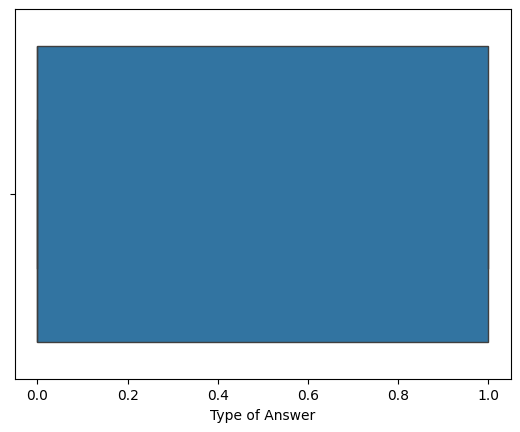

In [ ]:
sbn.boxplot(x=MathE['Type of Answer'])

# Exibir o gráfico
plt.show()

                Student ID  Question ID  Type of Answer
Student ID        1.000000     0.033439       -0.030064
Question ID       0.033439     1.000000       -0.013683
Type of Answer   -0.030064    -0.013683        1.000000


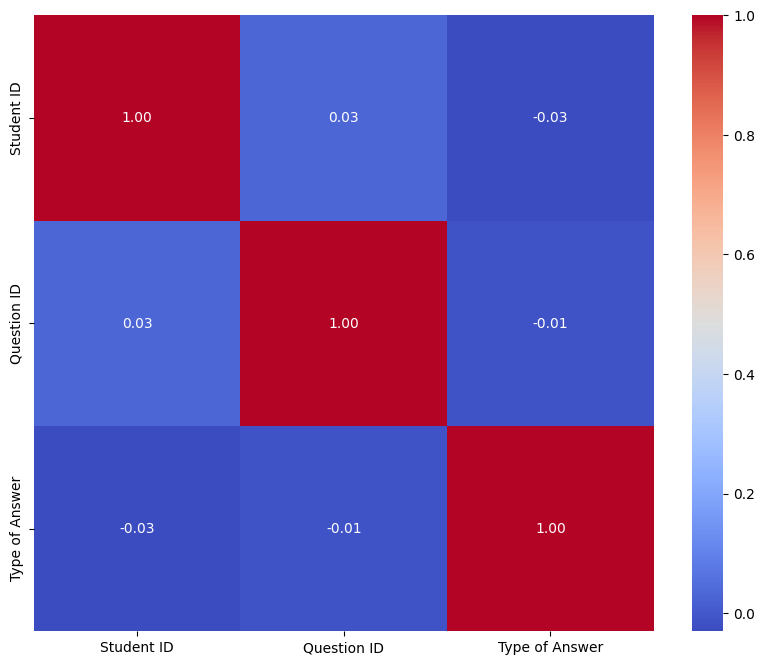

In [ ]:
# Selecionar apenas as colunas numéricas do DataFrame
df_numerico = df.select_dtypes(include=[np.number])

# Calcular a correlação
correlacao = df_numerico.corr()
print(correlacao)

# Criar o heatmap
plt.figure(figsize=(10,8))  # Ajustar tamanho do gráfico
sbn.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
# Exibindo os nomes das colunas no DataFrame
print(df.columns)


Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')


In [ ]:
# Remover espaços em branco no início e no fim dos nomes das colunas
df.columns = df.columns.str.strip()


In [ ]:
# Verificar as colunas após ajuste
print(df.columns)


Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency  # Importando o teste Qui-quadrado

# Criando a tabela de contingência
contingencia = pd.crosstab(df['Student Country'], df['Question Level'])

# Executando o teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# Resultados
print(f"Estatística Qui-quadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:\n", expected)

# Interpretação
if p < 0.05:
    print("Rejeitamos a hipótese nula: Existe associação entre as variáveis.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não existe associação entre as variáveis.")



Estatística Qui-quadrado: 239.62929344463458
P-valor: 4.455934291548657e-48
Graus de liberdade: 7
Frequências esperadas:
 [[  53.48837209  246.51162791]
 [ 242.12403101 1115.87596899]
 [ 257.27906977 1185.72093023]
 [ 979.72868217 4515.27131783]
 [  10.69767442   49.30232558]
 [  19.07751938   87.92248062]
 [ 134.6124031   620.3875969 ]
 [   4.99224806   23.00775194]]
Rejeitamos a hipótese nula: Existe associação entre as variáveis.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Lista de variáveis a considerar
variaveis = ['Student Country', 'Question Level', 'Topic', 'Subtopic']

# Criando uma lista para armazenar os resultados
resultados = []

# Loop para analisar combinações de variáveis
for i in range(len(variaveis)):
    for j in range(i+1, len(variaveis)):
        # Gerando tabela de contingência
        contingencia = pd.crosstab(df[variaveis[i]], df[variaveis[j]])

        # Executando o teste Qui-quadrado
        chi2, p, dof, expected = chi2_contingency(contingencia)

        # Armazenando os resultados em uma lista
        resultados.append({
            'Variável 1': variaveis[i],
            'Variável 2': variaveis[j],
            'Qui-quadrado': round(chi2, 2),
            'P-valor': round(p, 4),
            'Graus de Liberdade': dof,
            'Associação': 'Sim' if p < 0.05 else 'Não'
        })

# Convertendo os resultados para um DataFrame
tabela_resultados = pd.DataFrame(resultados)

# Exibindo a tabela formatada
print(tabela_resultados)


        Variável 1      Variável 2  Qui-quadrado  P-valor  Graus de Liberdade  \
0  Student Country  Question Level        239.63      0.0                   7   
1  Student Country           Topic       4137.84      0.0                  91   
2  Student Country        Subtopic       5686.59      0.0                 161   
3   Question Level           Topic        672.81      0.0                  13   
4   Question Level        Subtopic        966.62      0.0                  23   
5            Topic        Subtopic     124098.00      0.0                 299   

  Associação  
0        Sim  
1        Sim  
2        Sim  
3        Sim  
4        Sim  
5        Sim  
